<div style='background-image: url("main.png") ; padding: 0px ; background-size: cover ; border-radius: 5px ; height: 200px ; width: 100%'>
    <div style="float: right ; margin: 20px ; padding: 20px ; background: rgba(255 , 255 , 255 , 0.9) ; width: 50% ; height: 150px">
        <div style="position: relative ; top: 50% ; transform: translatey(-50%)">
            <div style="font-size: xx-large ; font-weight: 900 ; color: rgba(0 , 0 , 0 , .8) ; line-height: 100%">TP : statique des fluides
            </div>
            <div style="font-size: large ; padding-top: 20px ; color: rgba(0 , 0 , 0 , 0.5)">Notes de calcul
             </div>
        </div>
    </div>
</div>

In [1]:
# commande permettant d'insérer les figures matplotlib dans les notebooks
%matplotlib widget

# import des librairies 
import numpy as np
import matplotlib.pyplot as plt

# Mesures

In [2]:
# valeurs numériques utilisées
g = 9.81
mu_0 = 998.2

In [3]:
## Données expérimentales étudiants
# Hauteur d'eau relevée
H = np.array([0, 6, 12, 18, 24, 30, 36, 38])/100
u_H = np.array(len(H)*[.5])/100

# Pression statique mesurée
P=np.array([1008, 1013, 1019, 1025, 1030, 1037, 1042, 1045])*100
u_P=np.array(len(P)*[4])*100

# Régression linéaire

L'utilisation de la relation de la statique des fluides pour un fluide incompressible avec $\vec{g}=g\vec{u}_z$ permet d'établir que :
$$P=P_0+\mu_0 g z$$

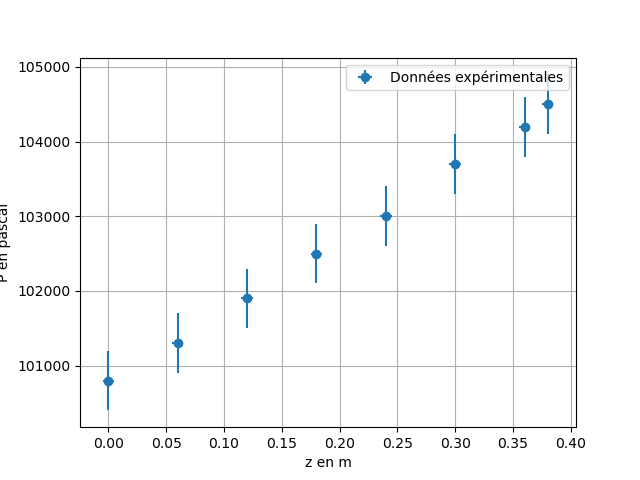

In [4]:

# Tracé des nuages de points et de leurs barres d'incertitude
plt.figure()
plt.errorbar(H, P, xerr=u_H, yerr = u_P, fmt='o',label="Données expérimentales")
plt.xlabel("z en m")
plt.ylabel("P en pascal")
plt.legend()
plt.grid(True)
plt.show()

L'aspect linéaire (affine en réalité) étant établi, on peut maintenant utiliser la méthode `polyfit` de `numpy` pour proposer un régression linéaire associée à cette collection de points.<br/>

In [5]:
# Nombre total de valeurs simulées
N=10000

# Déclaration des tableaux de stockage
a_fit=[]
b_fit=[]

# Calcul des N pentes et ordonnées à l'orgine par la méthode polyfit de numpy
for i in range(N):
    z=np.polyfit(np.array(H+u_H*np.random.uniform(-1,1,len(H))), np.array(P+u_P*np.random.uniform(-1,1, len(P))),1)
    a_fit.append(z[0])
    b_fit.append(z[1])
    
# Calcul de la moyenne et incertitude-type de la pente a et de l'ordonnée à l'origine b
a_fit_moy=np.mean(a_fit)
u_a_fit=np.std(a_fit,ddof=1)

b_fit_moy=np.mean(b_fit)
u_b_fit=np.std(b_fit, ddof=1)

On peut à nouveau tracer la courbe précédente en y rajoutant la droite obtenue par régression linéaire.

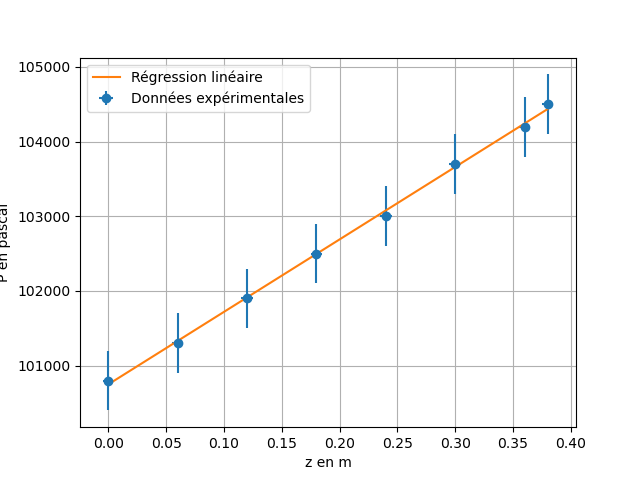

La valeur mesurée de la pente est de  9704. +/- 633. Pa/m


In [6]:
# Calcul du nuage de points associé à la droite de régression calculée précédemment
x=np.linspace(np.min(H), np.max(H), 1000)
y=a_fit_moy*x + b_fit_moy

# Tracé du nuage de points associé aux valeurs possibles de H et P
plt.figure()
plt.errorbar(H, P, xerr=u_H, yerr = u_P, fmt='o' ,label="Données expérimentales")
plt.plot(x,y, label="Régression linéaire")
plt.xlabel("z en m")
plt.ylabel("P en pascal")
plt.legend()
plt.grid(True)
plt.show()

print("La valeur mesurée de la pente est de ",format(a_fit_moy,"#.0f"),"+/-",format(u_a_fit,"#.0f"),"Pa/m")

# Conclusion

On déduit la valeur expérimentale de $\mu_0$ en calculant : 
$$\mu_0=\frac{\text{pente}}{g}$$
et on la compare à la valeur admise à 25°C

In [7]:
print("La valeur mesurée de la masse volumique de l'eau est :", format(a_fit_moy/g,"#.0f"),"+/-", format(u_a_fit/g,"#.0f"),"kg/m^3")

La valeur mesurée de la masse volumique de l'eau est : 989. +/- 65. kg/m^3
